In [1]:
import numpy as np
import matplotlib.pyplot as plt

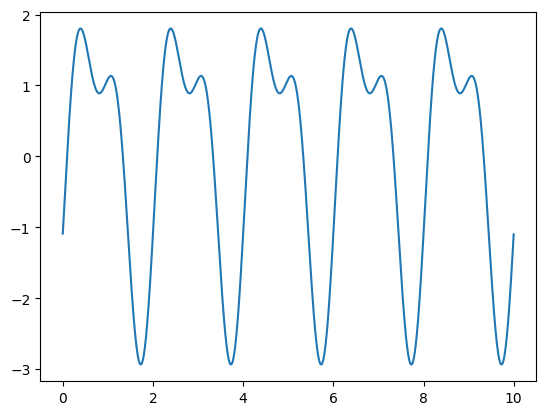

In [8]:
#Задаём время:
t = np.arange(0, 10, 0.001)

#Задаём случайный сигнал:
s = np.sin(2*np.pi*t) + np.sin(2*np.pi*t/2-np.pi/4) + np.sin(2*np.pi*t/2 - np.pi/8)

plt.plot(t,s)

In [23]:
print(np.min(s)/3, np.max(s)/3, len(t))

-0.9787434925072308 0.6010056584006999 10000


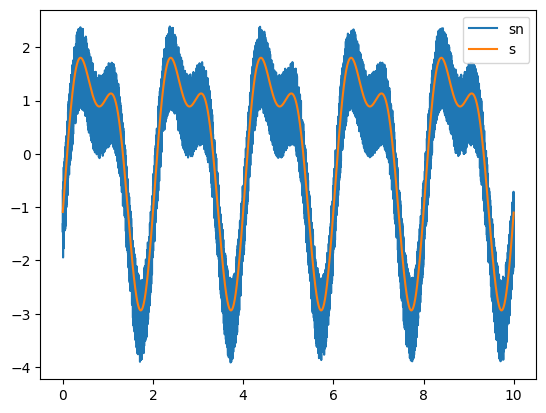

In [34]:
n = np.random.uniform(np.min(s)/3, np.max(s)/3, len(t)) #задаём шум
sn = s+n
plt.plot(t,sn, label='sn') #зашумлённый сигнал
plt.plot(t,s, label='s') #сигнал без шума
plt.legend()

In [25]:
# Для выполнения свертки
fil = np.ones(100)
s_for_conv = np.ones(len(s) + 2*len(fil)//2-1)
s_for_conv[len(fil)//2:len(fil)//2+len(s)] = sn
print(len(s_for_conv))

10099


In [26]:
s_matrix = []

for i in range(len(s)):
    s_matrix.append(s_for_conv[i:i+len(fil)])
print(len(s_matrix))
s_matrix = np.array(s_matrix)
print(s_matrix.shape)

10000
(10000, 100)


In [37]:
c = np.linalg.lstsq(s_matrix, s) #сохраняем результаты МНК в переменной c
print(c[0])

[0.00521234 0.00547401 0.00557244 0.00558061 0.00537233 0.00544127
 0.00541527 0.00572257 0.00601141 0.00622241 0.00588985 0.00572301
 0.00592143 0.00615695 0.00639212 0.00668794 0.00679347 0.00686444
 0.00666971 0.0069464  0.00715869 0.00757287 0.00747135 0.00775294
 0.00778725 0.00766569 0.00757657 0.00812488 0.00817416 0.00857731
 0.00909163 0.00942673 0.00959585 0.0103039  0.01105229 0.01136181
 0.01167152 0.01233098 0.01283612 0.01353309 0.01449251 0.01547753
 0.01606106 0.01679354 0.01715806 0.01785847 0.01898663 0.02002443
 0.02077212 0.02175403 0.02278444 0.02169733 0.02113697 0.02007989
 0.01941736 0.01831922 0.01737517 0.01653182 0.01575726 0.01502237
 0.01415661 0.01344228 0.01293798 0.01246313 0.01213738 0.01135058
 0.01128076 0.01047069 0.01041542 0.00968205 0.00893547 0.00845825
 0.00825556 0.00821211 0.00812987 0.00786392 0.00759505 0.00733755
 0.00736653 0.00710979 0.00689081 0.00656366 0.00676503 0.00649451
 0.00636185 0.00651296 0.0064442  0.00619462 0.00577944 0.0055

C:\Users\acer\AppData\Local\Temp\ipykernel_13432\796356082.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(s_matrix, s) #сохраняем результаты МНК в переменной c


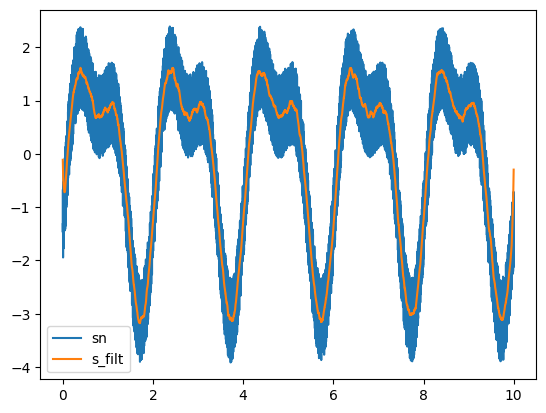

In [36]:
s_filt = s_matrix @ c[0]#[::-1]
plt.plot(t, sn, label = 'sn')
plt.plot(t, s_filt, label = 's_filt')
plt.legend()

(array([1300.,  585.,  480.,  450.,  445.,  455.,  510.,  650., 3375.,
        1750.]),
 array([-2.93623048, -2.46230573, -1.98838099, -1.51445624, -1.0405315 ,
        -0.56660675, -0.09268201,  0.38124274,  0.85516748,  1.32909223,
         1.80301698]),
 <BarContainer object of 10 artists>)

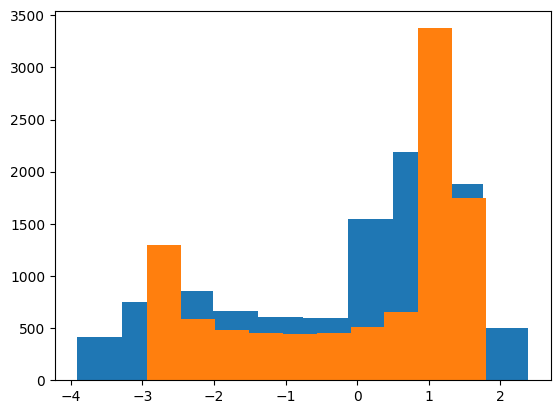

In [29]:
#Построение гистограмм
plt.hist(sn)
plt.hist(s)

In [54]:
c = 0.000005
fil = np.zeros(len(fil)) #массив new_fil нулей, размерность которого равна длине массива fil
filtered_signal = []
for i in range(len(s_matrix)):
    e = s_matrix[i] - fil @ s_matrix[i] #разница между текущим значением s_matrix[i] и  матричным произведением fil и s_matrix[i]
    filtered_signal.append(fil @ s_matrix[i])
    A = np.tile(s_matrix[i], ((len(fil),1))).T
    
    # Фильтр fil становится обновленным на каждой итерации цикла
    fil = fil + (c*A) @ e 

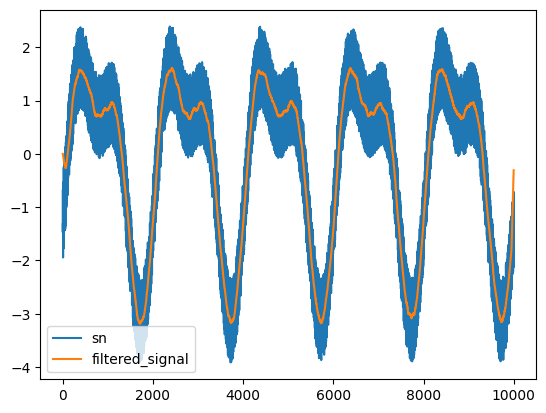

In [55]:
plt.plot(sn, label = 'sn')
plt.plot(filtered_signal, label = 'filtered_signal')
plt.legend()

In [ ]:
0